In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sb                       # to visualize
import pandas as pd                         # for data reading
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [30]:
df=data[(data["city"]!="São Paulo")&(data["city"]!="Rio de Janeiro")]
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


In [31]:
l=list(df.columns)
for i in l:
    print(i)

city
area
rooms
bathroom
parking spaces
floor
animal
furniture
hoa (R$)
rent amount (R$)
property tax (R$)
fire insurance (R$)
total (R$)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3304 entries, 2 to 10687
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 3304 non-null   object
 1   area                 3304 non-null   int64 
 2   rooms                3304 non-null   int64 
 3   bathroom             3304 non-null   int64 
 4   parking spaces       3304 non-null   int64 
 5   floor                3304 non-null   int64 
 6   animal               3304 non-null   object
 7   furniture            3304 non-null   object
 8   hoa (R$)             3304 non-null   int64 
 9   rent amount (R$)     3304 non-null   int64 
 10  property tax (R$)    3304 non-null   int64 
 11  fire insurance (R$)  3304 non-null   int64 
 12  total (R$)           3304 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 361.4+ KB


In [33]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [35]:
def col(df):
    x=df.select_dtypes(exclude='object')
    y=df.select_dtypes(include='object')
    x1=list(x.columns)
    y1=list(y.columns)
    return x1,y1


numerical,categorical=col(df)
print("Numerical")
print(numerical)
print("Categorical")
print(categorical)

Numerical
['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']
Categorical
['city', 'animal', 'furniture']


In [36]:
def info_cat(c):
    for i in range(len(c)):
        print(f"Unique values in {c[i]} are :{df[c[i]].unique()}")
        print(f'The Mode of the col {c[i]} is  {df[c[i]].mode()[0]}')
        print()
        
        
info_cat(categorical)

Unique values in city are :['Porto Alegre' 'Campinas' 'Belo Horizonte']
The Mode of the col city is  Belo Horizonte

Unique values in animal are :['acept' 'not acept']
The Mode of the col animal is  acept

Unique values in furniture are :['not furnished' 'furnished']
The Mode of the col furniture is  not furnished



In [37]:
def info_num(c):
    for i in range(len(c)):
        print(c[i])
        print(f'The Mean is : {df[c[i]].mean()}')
        print(f'The Median is : {df[c[i]].median()}')
        print(f'The STD is : {df[c[i]].std()}')
        print()
        
        
info_num(numerical)

area
The Mean is : 151.89769975786925
The Median is : 80.0
The STD is : 844.549115817972

rooms
The Mean is : 2.531174334140436
The Median is : 2.0
The STD is : 1.215849145366339

bathroom
The Mean is : 2.0438861985472156
The Median is : 2.0
The STD is : 1.3114272789929042

parking spaces
The Mean is : 1.5239104116222761
The Median is : 1.0
The STD is : 1.512898531675414

floor
The Mean is : 3.9900121065375305
The Median is : 3.0
The STD is : 6.689621479822255

hoa (R$)
The Mean is : 1224.822033898305
The Median is : 366.5
The STD is : 27477.762415061632

rent amount (R$)
The Mean is : 2849.6032082324455
The Median is : 1800.0
The STD is : 2859.528061327034

property tax (R$)
The Mean is : 186.76452784503633
The Median is : 86.0
The STD is : 361.6002081116756

fire insurance (R$)
The Mean is : 41.95127118644068
The Median is : 25.0
The STD is : 44.134503754264465

total (R$)
The Mean is : 4303.3265738498785
The Median is : 2348.0
The STD is : 27679.63993475239



In [38]:
for i in range(len(numerical)):
    print(numerical[i])
    print(df[numerical[i]].unique())

area
[   80    51    46   330    42    64   208    38    40   200    45   100
   250    48    93    75   300   220   128    47   170    68   350   296
    44   240    70    50    67   400   284   133    95    62   999    24
    90   101   140    78    36    85    83    39    60   180   420    59
   225    76    43    58   570    91   155    94   308   131   320    96
   236   125   135    92    28    19   230    37   600    35    15   105
   204    25    49   120    87   113   306   181   168   362    84    73
   198    55    52   312   160    57    88    61    72   360   440   123
    53    74   417   110   548   193   428   103   500   106   260   398
   176   680   450   152    41   214   311    29   750   142   650   119
  1000   185   205   550   405    20    82    30   325    65   383   341
    98    77   345   298   293   305   367   148   130   840    66   136
   184   290   150   212   280   340    71   154   800    18   263   166
   118   134   188    54   116   144   111   1

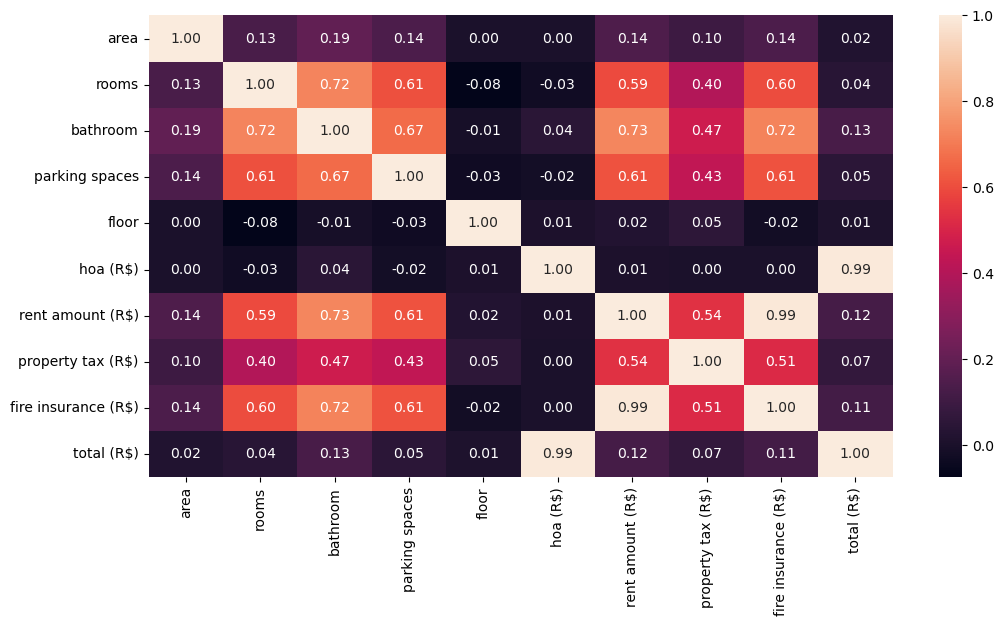

In [12]:
cor=df.corr()
plt.figure(figsize=(12,6))
sb.heatmap(cor,annot=True,fmt='.2f')
plt.show()

### We can say that animal ,furniture and parking space can affect our analysis

## 1. We need to find housing for bachelor
### Since the person just started career that person would have low budget,1 or 2 rooms  room should be enough
### lets assume budget less than 800

In [13]:
x=df[(df['total (R$)']<=800)&(df['rooms']<=2)]
x

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
185,Porto Alegre,36,1,1,1,0,acept,not furnished,0,762,15,14,791
325,Porto Alegre,28,2,1,1,0,acept,not furnished,0,600,0,11,611
1219,Porto Alegre,60,2,1,1,0,acept,not furnished,0,540,0,10,550
1606,Belo Horizonte,15,1,1,0,0,acept,not furnished,45,665,0,9,719
1847,Belo Horizonte,30,1,1,0,2,not acept,not furnished,0,550,0,8,558
1990,Porto Alegre,24,1,1,1,0,not acept,not furnished,0,550,0,9,559
2093,Belo Horizonte,40,1,1,0,0,not acept,not furnished,0,650,59,11,720
2121,Porto Alegre,25,1,1,0,0,not acept,not furnished,0,550,0,9,559
2386,Belo Horizonte,25,1,1,1,1,not acept,not furnished,0,550,84,8,642
3297,Porto Alegre,30,1,1,1,0,acept,not furnished,0,762,15,14,791


<Axes: xlabel='city', ylabel='count'>

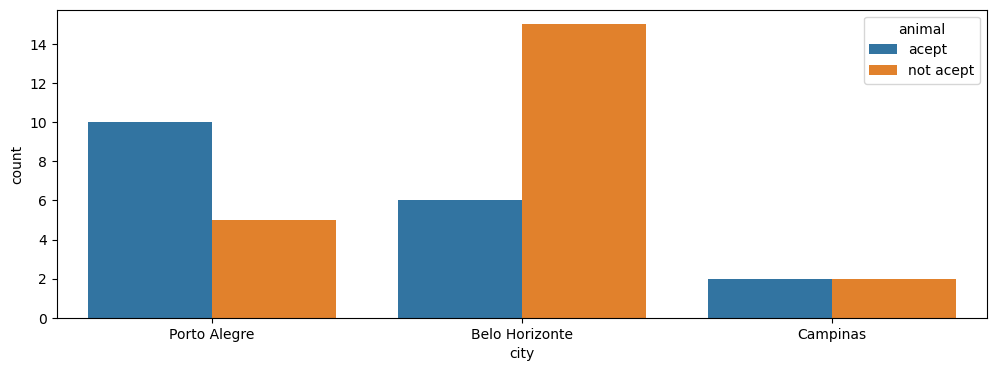

In [17]:
plt.figure(figsize=(12,4))
sb.countplot(x='city',hue='animal',data=x)

<Axes: xlabel='city', ylabel='count'>

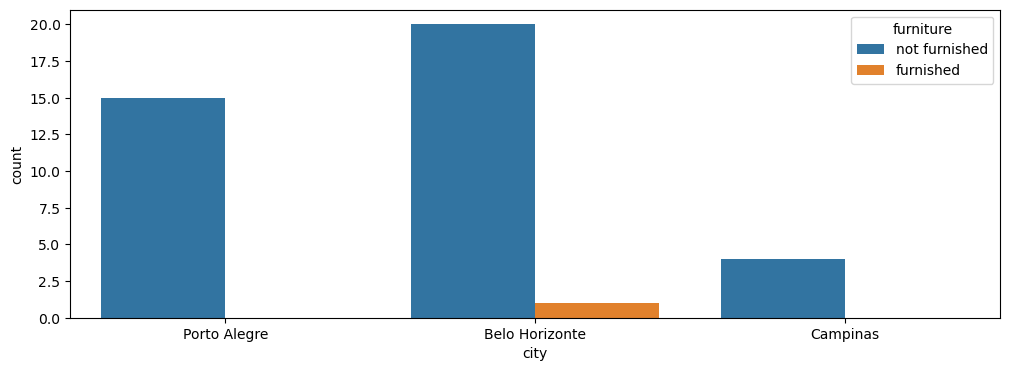

In [18]:
plt.figure(figsize=(12,4))
sb.countplot(x='city',hue='furniture',data=x)

<Axes: xlabel='city', ylabel='count'>

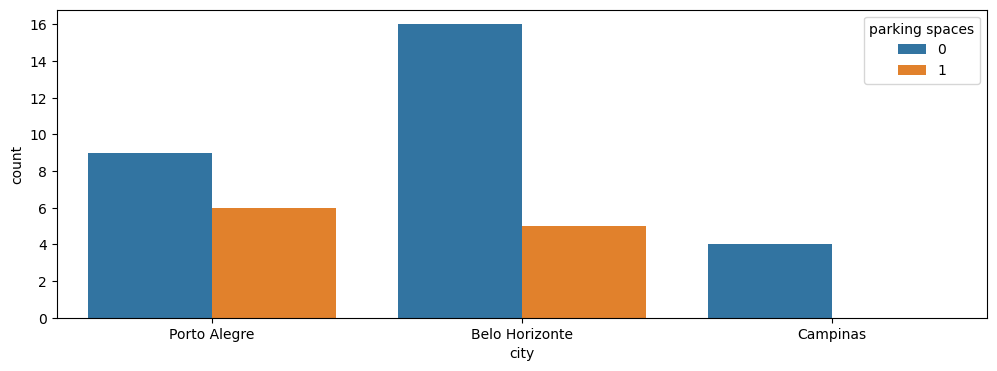

In [19]:
plt.figure(figsize=(12,4))
sb.countplot(x='city',hue='parking spaces',data=x)

### From above Charts we can say that for bachelor this city would be preferred for:
#### with pet: Belo Horizonte
#### Without pet: Porto Alegre
#### furnished: Belo Horizonte
#### notfurnished: Belo Horizonte
#### 0 parking space: Belo Horizonte
#### 1 parking space: Porto Alegre

## 2. We need to find housing for mid_size Family
### no.of room reqiured would be 2 or 3, need to have parking spot atmost 1, 2 bathrooms

In [36]:
x=df[(df['parking spaces']<=2)&(df['bathroom']>=2)&((df['rooms']>=2)&(df['rooms']<4))]
x

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
27,Belo Horizonte,64,2,2,1,11,acept,not furnished,352,1500,80,20,1952
37,Belo Horizonte,80,3,2,1,0,acept,not furnished,0,11000,425,181,11610
48,Campinas,250,3,3,2,1,acept,not furnished,2200,1700,256,22,4178
57,Campinas,93,2,3,2,9,acept,not furnished,663,5500,133,70,6366
58,Porto Alegre,75,3,2,1,9,acept,not furnished,340,1800,109,27,2276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10629,Campinas,83,2,2,2,1,acept,furnished,800,3700,234,47,4781
10635,Porto Alegre,100,3,2,2,2,acept,furnished,900,2455,125,36,3516
10641,Belo Horizonte,58,2,2,1,5,acept,not furnished,400,999,99,14,1512
10651,Belo Horizonte,95,3,2,2,7,acept,not furnished,525,3100,219,42,3886


<Axes: xlabel='city', ylabel='count'>

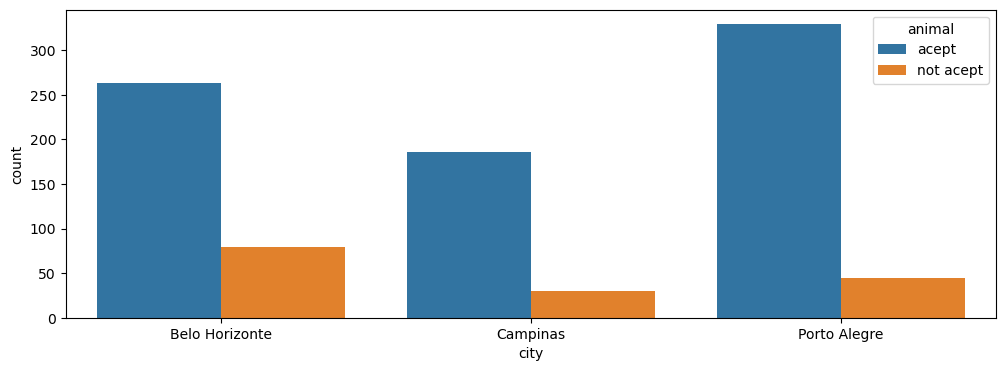

In [37]:
plt.figure(figsize=(12,4))
sb.countplot(x='city',hue='animal',data=x)

<Axes: xlabel='city', ylabel='count'>

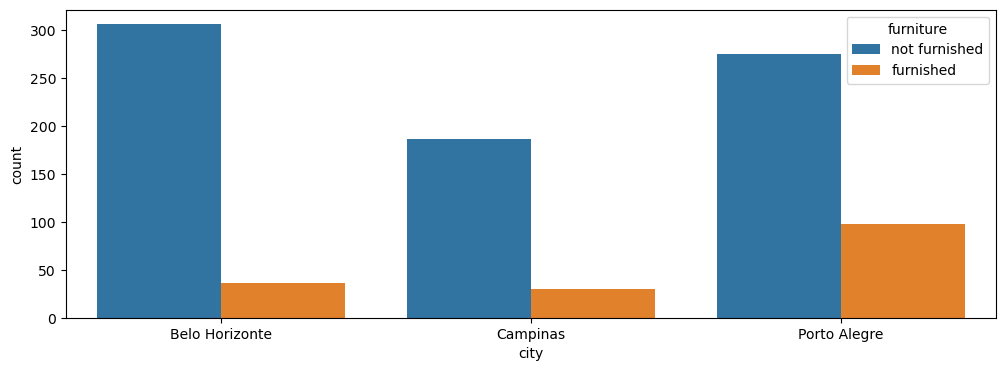

In [38]:
plt.figure(figsize=(12,4))
sb.countplot(x='city',hue='furniture',data=x)

<Axes: xlabel='city', ylabel='count'>

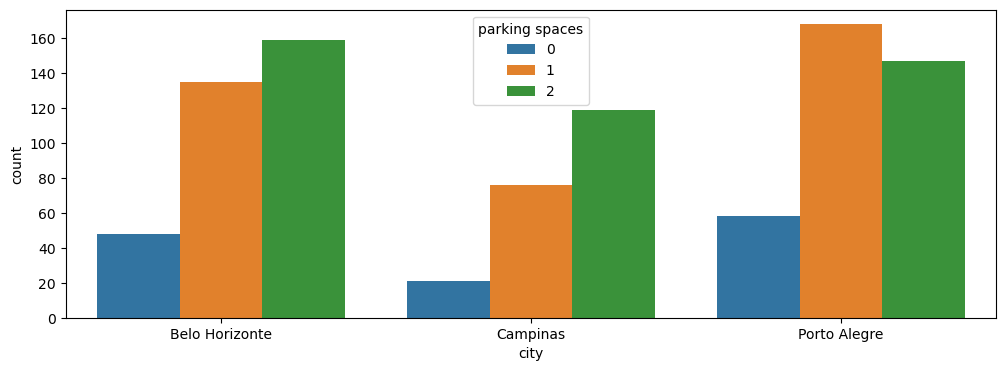

In [27]:
plt.figure(figsize=(12,4))
sb.countplot(x='city',hue='parking spaces',data=x)

### From above Charts we can say that for mid_size Family this city would be preferred for:
#### with pet: Porto Alegre
#### Without pet: Belo Horizonte
#### furnished: Porto Alegre
#### notfurnished: Belo Horizonte
#### 0 parking space: Porto Alegre
#### 1 parking space: Porto Alegre
#### 2 parking space: Belo Horizonte

##  3. we need to find housing for large Family
### need more than 4 rooms more than 2 bathrooms and more than 1 parking space

In [39]:
x=df[(df['parking spaces']>1)&(df['bathroom']>2)&(df['rooms']>4)]
x

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
143,Campinas,999,5,7,8,0,acept,not furnished,0,14000,667,211,14880
241,Belo Horizonte,570,5,6,7,0,acept,furnished,0,8330,873,137,9340
404,Belo Horizonte,168,5,3,2,2,acept,not furnished,1443,2900,408,39,4790
432,Campinas,198,6,3,4,0,acept,not furnished,0,2000,145,31,2176
538,Belo Horizonte,428,5,5,4,0,acept,furnished,0,9600,667,158,10430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,Belo Horizonte,460,5,8,5,0,not acept,not furnished,0,7320,0,121,7441
10392,Porto Alegre,480,5,4,7,0,acept,not furnished,0,3600,38,64,3702
10476,Porto Alegre,600,5,7,5,0,acept,not furnished,0,7000,834,125,7959
10587,Belo Horizonte,500,8,5,8,0,acept,not furnished,0,5000,150,82,5232


<Axes: xlabel='city', ylabel='count'>

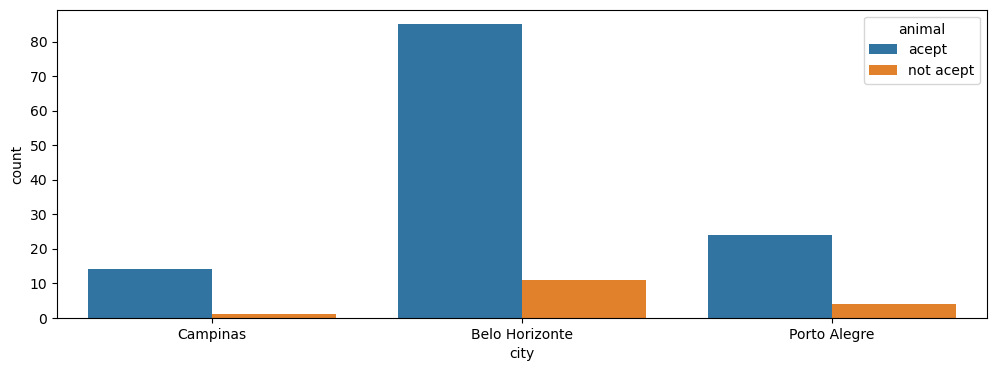

In [40]:
plt.figure(figsize=(12,4))
sb.countplot(x='city',hue='animal',data=x)

<Axes: xlabel='city', ylabel='count'>

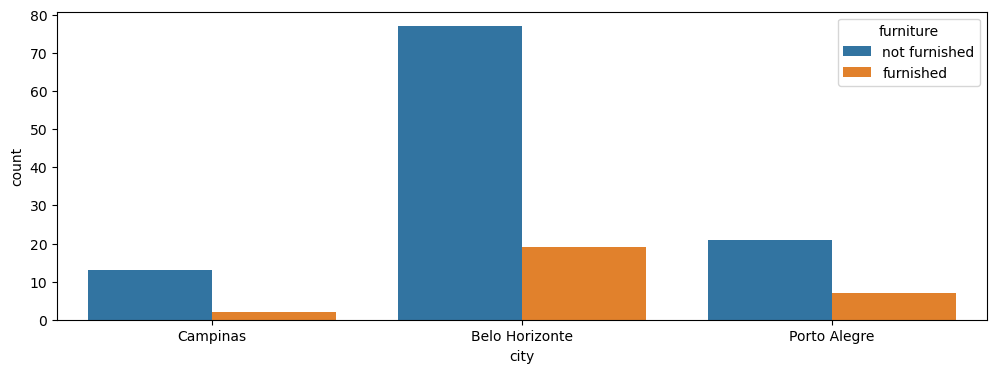

In [41]:
plt.figure(figsize=(12,4))
sb.countplot(x='city',hue='furniture',data=x)

<Axes: xlabel='city', ylabel='count'>

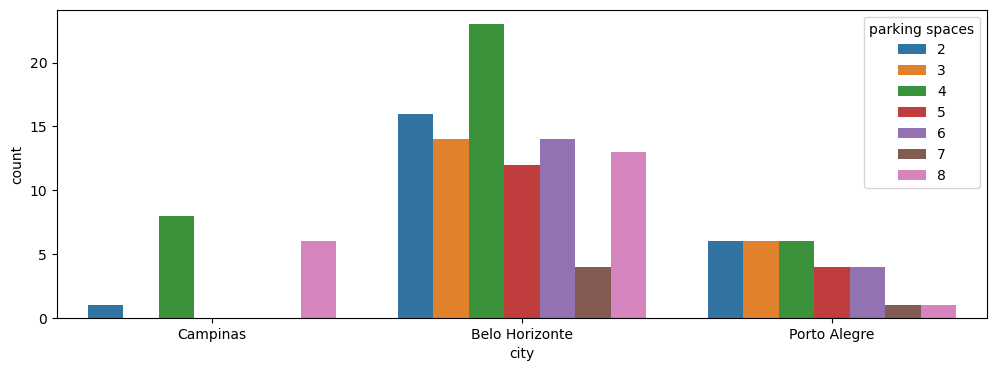

In [42]:
plt.figure(figsize=(12,4))
sb.countplot(x='city',hue='parking spaces',data=x)

### From above Charts we can say that for large Family this city would be preferred for:
#### with pet: Belo Horizonte
#### Without pet: Belo Horizonte
#### furnished: Belo Horizonte
#### notfurnished: Belo Horizonte
#### more then 2 parking space: Belo Horizonte